# Assignment 2

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', size = 11)
sns.set_style('darkgrid')

In [91]:
data = pd.read_csv("/content/Traffic_Violations.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292399 entries, 0 to 1292398
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1292399 non-null  object 
 1   Time Of Stop             1292399 non-null  object 
 2   Agency                   1292399 non-null  object 
 3   SubAgency                1292389 non-null  object 
 4   Description              1292390 non-null  object 
 5   Location                 1292397 non-null  object 
 6   Latitude                 1197045 non-null  float64
 7   Longitude                1197045 non-null  float64
 8   Accident                 1292399 non-null  object 
 9   Belts                    1292399 non-null  object 
 10  Personal Injury          1292399 non-null  object 
 11  Property Damage          1292399 non-null  object 
 12  Fatal                    1292399 non-null  object 
 13  Commercial License       1292399 non-null 

In [5]:
#get the null value count
data.columns = data.columns.str.replace(' ', '')
data.isna().sum()

DateOfStop                   0
TimeOfStop                   0
Agency                       0
SubAgency                   10
Description                  9
Location                     2
Latitude                 95354
Longitude                95354
Accident                     0
Belts                        0
PersonalInjury               0
PropertyDamage               0
Fatal                        0
CommercialLicense            0
HAZMAT                       0
CommercialVehicle            0
Alcohol                      0
WorkZone                     0
State                       59
VehicleType                  0
Year                      8074
Make                        57
Model                      187
Color                    16127
ViolationType                0
Charge                       0
Article                  65169
ContributedToAccident        0
Race                         0
Gender                       0
DriverCity                 217
DriverState                 11
DLState 

In [6]:
#remove unneccessary columns
data.drop(columns = ['Geolocation','Article','Latitude','Longitude','Description','Agency','SubAgency'], inplace=True)

# **To calculate the color count**

In [7]:
data.dropna(subset = ['Color'], inplace = True) #remove the null values

In [8]:
data['Color'].isna().sum() 

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

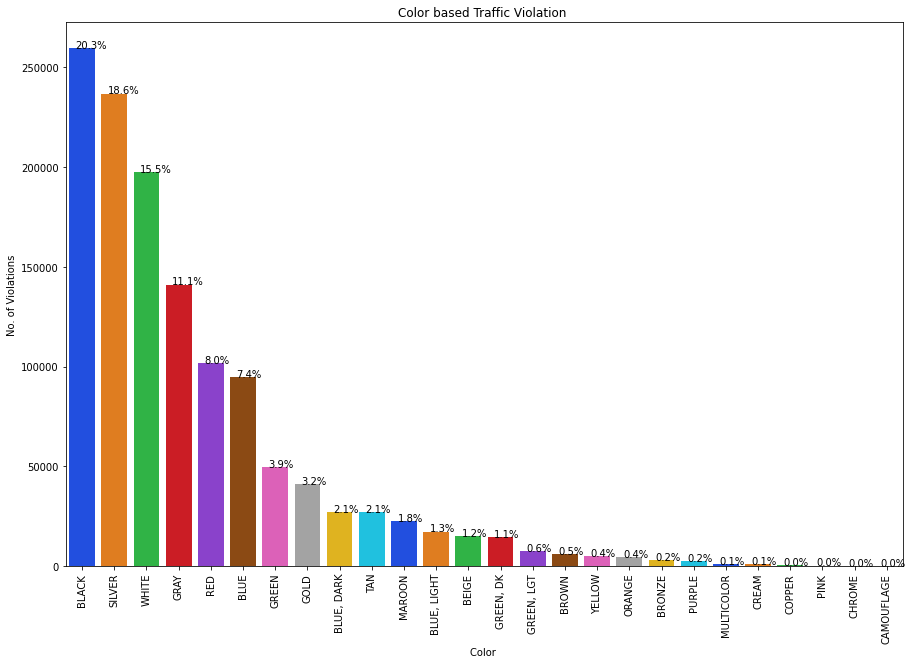

In [9]:
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.countplot(x=data.Color, data=data, order = data.Color.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.Color))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Color based Traffic Violation ')
plt.xlabel("Color ")
plt.ylabel("No. of Violations")
plt.xticks(rotation=90)

In [72]:
colordata=data.value_counts(["Color"]).head(10)
print(colordata)

Color     
BLACK         259460
SILVER        236810
WHITE         197537
GRAY          141078
RED           101723
BLUE           94798
GREEN          49514
GOLD           41171
BLUE, DARK     27110
TAN            27013
dtype: int64


# To find the most violated Make and Model 

In [10]:
data.dropna(subset = ['Model','Make'], inplace = True) #remove na

In [11]:
print(data['Model'].isna().sum())
print(data['Make'].isna().sum())

0
0


In [58]:
data['Make'].mask(data['Make'] == 'TOYOT', "TOYOTA", inplace=True) #combine the redundant values

In [59]:
car_make_data=data.value_counts(["Make"])

In [60]:
car_make_data.head(15)

Make     
TOYOTA       216859
HONDA        185722
FORD         120801
NISSAN        96389
CHEV          39472
BMW           35340
DODGE         34457
CHEVY         29772
ACURA         28901
JEEP          28692
CHEVROLET     27190
HYUNDAI       23929
LEXUS         20301
MERZ          19012
MAZDA         18396
dtype: int64

In [68]:
makedata=data.value_counts(["Make", "Model"])
makedata_df=makedata.to_frame()

In [89]:
makedata_df.head(5)

0
Make   Model         
HONDA  ACCORD   47040
       CIVIC    43929
TOYOTA CAMRY    42021
       COROLLA  37207
       4S       27207

**Racial Estimation**

Text(0, 0.5, 'Count')

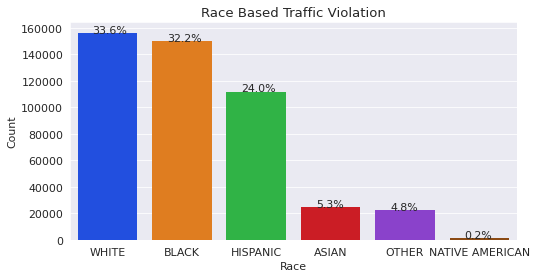

In [ ]:
fig , ax = plt.subplots(figsize = (8,4))
ax = sns.countplot(x=data.Race, data=data, order = data.Race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.Race))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Race Based Traffic Violation')
plt.xlabel("Race")
plt.ylabel("Count")

**Gender Estimation**

Text(0, 0.5, 'Count')

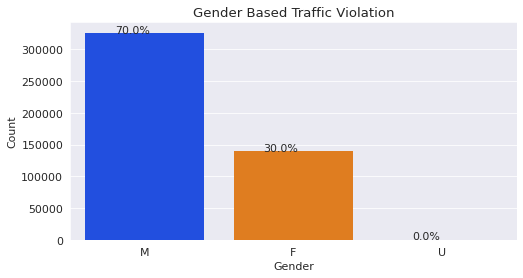

In [ ]:
fig , ax = plt.subplots(figsize = (8,4))
ax = sns.countplot(x=data.Gender, data=data, order = data.Gender.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.Gender))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Gender Based Traffic Violation')
plt.xlabel("Gender")
plt.ylabel("Count")